In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
X_train = pd.read_csv("C:/Code/defi-credit-score/datasets/train_data.csv")
X_test = pd.read_csv("C:/Code/defi-credit-score/datasets/test_data.csv")

In [3]:
weights = {
    'count_deposit': +2,
    'count_borrow': -1,
    'count_repay': +3,
    'count_withdraw': -1,
    'count_liquidation': -5,
    'avg_deposit': +2,
    'avg_borrow': -1,
    'avg_repay': +3,
    'avg_withdraw': -1,
    'withdraw_to_depo': -2,
    'borrow_to_deposit': -2,
    'repay_to_borrow': +4,
}


In [4]:
X_train.columns

Index(['index', 'count_deposit', 'count_borrow', 'count_repay',
       'count_withdraw', 'count_liquidation', 'avg_deposit', 'avg_borrow',
       'avg_repay', 'avg_withdraw', 'withdraw_to_depo', 'borrow_to_deposit',
       'repay_to_borrow'],
      dtype='object')

In [5]:
import pandas as pd

X_train["credit_score_raw"] = X_train[list(weights)].dot(pd.Series(weights))
X_test["credit_score_raw"] = X_test[list(weights)].dot(pd.Series(weights))

combined_scores = pd.concat([X_train["credit_score_raw"], X_test["credit_score_raw"]])

_, bin_edges = pd.qcut(combined_scores, q=10, retbins=True, labels=False, duplicates='drop')

y_train = pd.cut(X_train["credit_score_raw"], bins=bin_edges, labels=[0,1,2,3,4,5,6,7,8,9], include_lowest=True)
y_test = pd.cut(X_test["credit_score_raw"], bins=bin_edges, labels=[0,1,2,3,4,5,6,7,8,9], include_lowest=True)

In [6]:
y_train

0       8
1       5
2       9
3       3
4       7
       ..
2792    5
2793    0
2794    3
2795    3
2796    0
Name: credit_score_raw, Length: 2797, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

In [7]:
X_train_final = X_train.drop("credit_score_raw", axis="columns")
X_test_final = X_test.drop("credit_score_raw", axis="columns")

In [8]:
X_train_final.head()

,index,count_deposit,count_borrow,count_repay,count_withdraw,count_liquidation,avg_deposit,avg_borrow,avg_repay,avg_withdraw,withdraw_to_depo,borrow_to_deposit,repay_to_borrow
0,53,0.013699,0.030,0.010309,0.000631,0.0,1.723101e-03,1.006672e-03,1.622790e-03,0.001355,1.249916e-10,0.382382,0.938287
1,2239,0.003914,0.000,0.000000,0.000000,0.0,3.889501e-07,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
2,1209,0.001957,0.005,0.003436,0.000140,0.0,1.048887e-05,2.025926e-11,1.636427e-11,0.000004,1.010666e-10,0.000001,0.924636
3,1951,0.001957,0.000,0.000000,0.000000,0.0,4.009121e-07,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
4,717,0.037182,0.140,0.024055,0.000491,0.0,1.637760e-04,8.273521e-05,1.643206e-04,0.000148,4.115064e-11,0.568475,0.578007


In [9]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression(max_iter=1000)
model_log.fit(X_train_final, y_train)

C:\Users\aryan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [10]:
from sklearn.metrics import classification_report
y_pred = model_log.predict(X_test_final)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90        75
           1       1.00      0.41      0.58        76
           2       0.00      0.00      0.00        76
           3       0.19      0.04      0.07        67
           4       0.16      0.93      0.28        60
           5       0.00      0.00      0.00        71
           6       0.21      0.04      0.07        67
           7       0.79      0.72      0.75        67
           8       0.75      0.76      0.76        68
           9       0.80      0.84      0.82        73

    accuracy                           0.47       700
   macro avg       0.47      0.47      0.42       700
weighted avg       0.48      0.47      0.43       700



C:\Users\aryan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\aryan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\aryan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [11]:
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(X_train_final, y_train)
# test accuracy
y_pred = model_xg.predict(X_test_final)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        75
           1       0.89      0.87      0.88        76
           2       0.97      1.00      0.99        76
           3       1.00      1.00      1.00        67
           4       0.92      0.97      0.94        60
           5       0.97      0.96      0.96        71
           6       0.87      0.90      0.88        67
           7       0.91      0.88      0.89        67
           8       0.86      0.88      0.87        68
           9       0.93      0.88      0.90        73

    accuracy                           0.93       700
   macro avg       0.93      0.93      0.93       700
weighted avg       0.93      0.93      0.93       700



In [12]:
# train accuracy
y_pred_train = model_xg.predict(X_train_final)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       275
           1       1.00      1.00      1.00       274
           2       1.00      1.00      1.00       273
           3       1.00      1.00      1.00       283
           4       1.00      1.00      1.00       290
           5       1.00      1.00      1.00       278
           6       1.00      1.00      1.00       283
           7       1.00      1.00      1.00       282
           8       1.00      1.00      1.00       282
           9       1.00      1.00      1.00       277

    accuracy                           1.00      2797
   macro avg       1.00      1.00      1.00      2797
weighted avg       1.00      1.00      1.00      2797



In [13]:
best_model = model_xg

In [14]:
feature_imp = best_model.feature_importances_
feature_imp

array([0.00346011, 0.14691961, 0.15009753, 0.07547338, 0.0276769 ,
       0.03654986, 0.14510378, 0.01309519, 0.01600462, 0.01716928,
       0.06008183, 0.13778213, 0.17058575], dtype=float32)

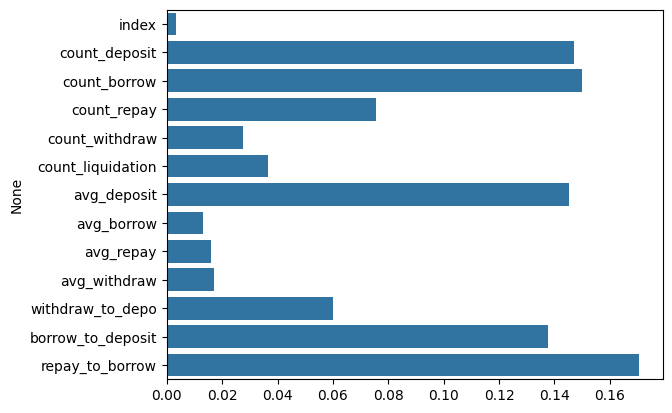

In [15]:
sns.barplot(y=X_train_final.columns, x=feature_imp)
plt.show()

In [16]:
# from joblib import dump
# dump(best_model, "artifacts/model.joblib")

In [17]:
# final_cols = X_train_final.columns.to_list()
# dump(final_cols, "artifacts/final_col.joblib")

In [18]:
y_proba = best_model.predict_proba(X_train_final)
quantile_to_score = [i * 100 for i in range(0, 10)]
expected_scores = y_proba @ quantile_to_score
wallet_scores = pd.DataFrame({
    "score": expected_scores
})

In [19]:
scores = wallet_scores.get("score")

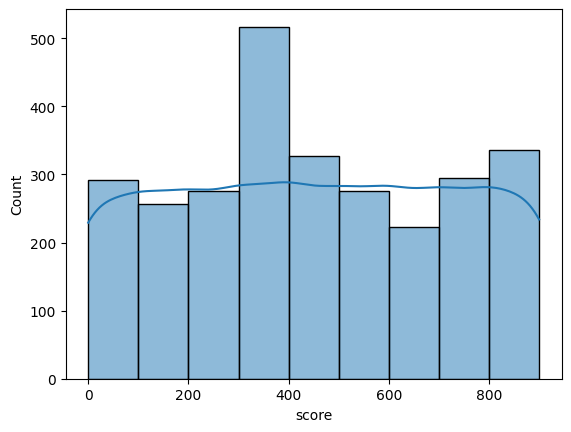

In [20]:
sns.histplot(scores, binwidth=100, kde=True)
plt.show()

In [21]:

# # Sample scores (replace this with your actual score series)

# # Define score bins and labels
# bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
# labels = ['0–100', '101–200', '201–300', '301–400', '401–500', 
#           '501–600', '601–700', '701–800', '801–900']

# # Cut the scores into bins
# score_ranges = pd.cut(scores, bins=bins, labels=labels, include_lowest=True, right=True)

# # Count wallets in each range
# distribution = score_ranges.value_counts().sort_index()

# # Create the final table
# distribution_df = pd.DataFrame({
#     "Score Range": labels,
#     "Number of Wallets": distribution.values
# })

# # Print markdown-style table
# print("| Score Range | Number of Wallets |")
# print("|-------------|--------------------|")
# for index, row in distribution_df.iterrows():
#     print(f"| {row['Score Range']} | {row['Number of Wallets']:>18} |")
